### Problem Set 2

#### Boot Camp 2018 Week 2 -- Prof. John Stachurski
#### Name: Zunda Xu (zunda@uchicago.edu)

### Part 1

#### Exercise 1

1.Read it in and compute the spectral raduis using the tools for working with eigenvalues in scipy.linalg.

In [1]:
# First we import some package and library
import numpy as np
from scipy import linalg as linalg
from numpy import linalg as LA
from numpy import random as random
import matplotlib.pyplot as plt
from numba import jit, njit, float64, prange, vectorize 

In [2]:
# Then we read in the data 
matrix_X = np.loadtxt('matrix_data.txt')

In [3]:
# Find the spectral raduis using scipy.linglg
evals = abs(linalg.eig(matrix_X)[0])
r_X = np.max(evals)
print("r(X) is :", r_X)

r(X) is : 1.00442776945


2.Test the claim in (LSR) iteratively

In [15]:
# create a non-zero vector
v = np.ones(10) 

#number of iterations we want
max_iter = 20000

#initialise matrix to store output
store_results = np.zeros(max_iter) 

for i in range(max_iter):
    X_T = np.transpose(np.matmul(LA.matrix_power(matrix_X, i+1), v))
    X = np.matmul(LA.matrix_power(matrix_X, i+1), v)
    norm = np.matmul(X, X_T)
    result = (norm**0.5)**(1/(i+1))
    store_results[i] = result
       
#print(store_results[max_iter-1])

In [20]:
print("The output is:", store_results[max_iter-1])
print("The difference between spectral raduis and out put is:", store_results[max_iter-1]-r_X)

The output is: 1.00448779188
The difference between spectral raduis and out put is: 6.00224365426e-05


From the results shown above, we note that after 20000 iterations, which means $i=20000$, the difference between the spectral raduis $r(X)$ and the limit is 6.00224365426e-05, which can show that the sequence converges.

#### Exercise 2

In [26]:
#First we define the quadratic map function

@jit
def quadratic_map():
    n = 50000 
    x = np.empty(n)
    x[0] = random.uniform(0,1)
    for i in range(n-1):
        x[i+1] = 4*x[i]*(1 - x[i])
    return x

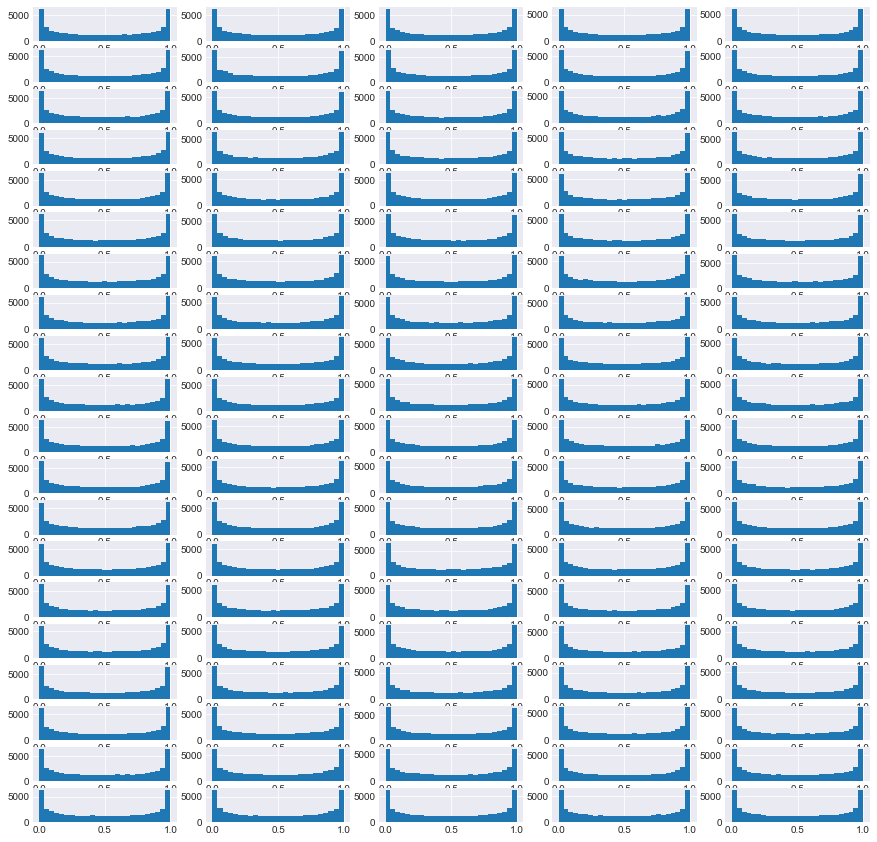

In [37]:
# generating 100 histograms of time series
plt.figure(figsize=(15,15 ))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Accent')

for i in range(100):
    place = i + 1
    x = quadratic_map()
    plt.subplot(20, 5, place)
    plt.hist(x, bins='auto')

plt.show()

#### Exercise 3

**Proof:**

(The following proof refer to Zeshun Zong)

By assumption, $\lim_{t \to \infty} g^t(x) = \hat{x}$ for some $x$.
Now, pick any $x_0$ such that the above limit converges. Let $x_1 = g(x_0), x_2 = g(x_1), ... x_t = g(x_{t-1}).$ Then it follows that $\lim_{t \to \infty} x_t = \hat{x}$.
Since $g$ is continuous at $\hat{x}$, $\exists \delta > 0$, such that $g$ is continuous on $B(\hat{x}, \delta)$, the interval centered at $\hat{x}$ with radius $\delta$. By definition of limit, fix this $\delta > 0, \exists N \in \mathbb{N}$, s.t. if $n>N, |x_n - \hat{x}| < \delta.$ We consider the subsequence of $\{x_t\}_{t=N+1}^{\infty},$ where each each $x_t$ falls in the interval where $g$ is continuous.
By the sequential characterization of continuous function, we have 
$$\hat{x} = \lim_{t \to \infty} x_t = g(\lim_{t \to \infty} x_t) = g(\hat{x}).$$ Hence $\hat{x}$ is a steady state.

### Part 2

#### Exercise 1

In [38]:
# First we still import some packages and libraries used in this part
from scipy.stats import norm
from scipy.stats import beta

In [39]:
# Define the class
class KDE(object):

    def __init__(self, data, bandwidth='silverman'):
        self.data = data
        self.n = len(data)
        self.var = np.var(data)
        self.mean = np.mean(data)
        if bandwidth == 'silverman':
            # The following formula is from wikipedia
            self.bandwidth = 1.06*((np.var(data))**0.5)*(len(data))**(-0.2) 
        else:
            self.bandwidth = bandwidth
     
    def f(self, x):
        y = np.zeros(len(x))       
        for i in range(len(x)):
            z = np.zeros(len(self.data))
            for j in range(len(self.data)):
                z[j] = norm.pdf((x[i] - self.data[j])/self.bandwidth)
            
            y[i] = (1/(self.bandwidth*self.n))*(np.sum(z))
        return y

In [40]:
# Then test the class using the Beta distribution
data_1 = random.beta(2, 2, size=(100, 1))
data_2 = random.beta(2, 5, size=(100, 1))
data_3 = random.beta(0.5, 0.5, size=(100, 1))

x = np.linspace(0, 1, 100)

KDE_1 = KDE(data_1)
KDE_2 = KDE(data_2)
KDE_3 = KDE(data_3)

f_1 = KDE_1.f(x)
f_2 = KDE_2.f(x)
f_3 = KDE_3.f(x)

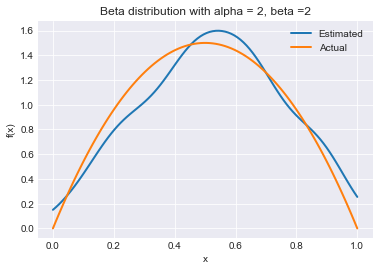

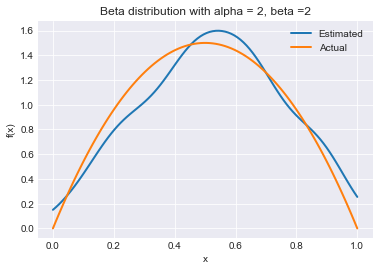

In [42]:
# Then we plot the estimated distribution and the true distribution.
plt.figure()
plt.plot(x, f_1, linewidth=2.0)
plt.plot(x, beta.pdf(x, 2, 2), linewidth=2.0)
plt.legend(['Estimated Distribution', 'Actual Distribution'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta distribution with alpha = 2, beta =2')
plt.show()

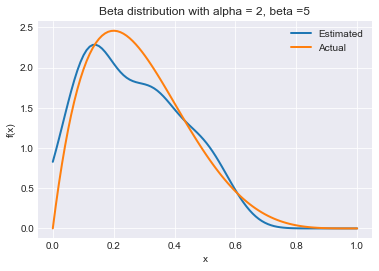

In [43]:
plt.figure()
plt.plot(x, f_2, linewidth=2.0)
plt.plot(x, beta.pdf(x, 2, 5), linewidth=2.0)
plt.legend(['Estimated Distribution', 'Actual Distribution'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta distribution with alpha = 2, beta =5')
plt.show()

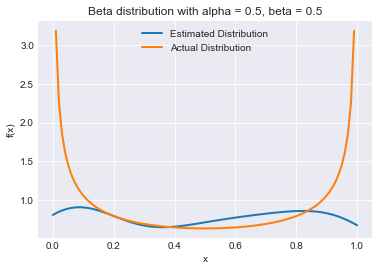

In [44]:
plt.figure()
plt.plot(x, f_3, linewidth=2.0)
plt.plot(x, beta.pdf(x, 0.5, 0.5), linewidth=2.0)
plt.legend(['Estimated Distribution', 'Actual Distribution'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Beta distribution with alpha = 0.5, beta = 0.5')
plt.show()

From the three graphs shown above, we note that our estimator is good for the first two beta distributions, which means when alpha and beta is large, our estimator has a better performance. However, when alpha and beta are small. the estimation is not that good.

#### Exercise 2

In [45]:
#Set up the parameters
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3
s = 0.2

In [62]:
# Set x value
x = np.linspace(-5, 0, 1000)

# Generate simulation
# Define a simulation function 
def simulation(n):
    #X_t = np.zeros(n)
    X_t = random.normal(mu, s, n) 
    e_t_1 = random.normal(0, 1, n) 
    #X_t_1 = np.zeros(n)
    X_t_1 = rho*X_t + b + sigma*e_t_1 
    estimation = KDE(X_t_1) 
    pdf = estimation.f(x) 
    return pdf

In [63]:
simulation_1 = simulation(5)
simulation_2 = simulation(10)
simulation_3= simulation(50)
simulation_4= simulation(100)

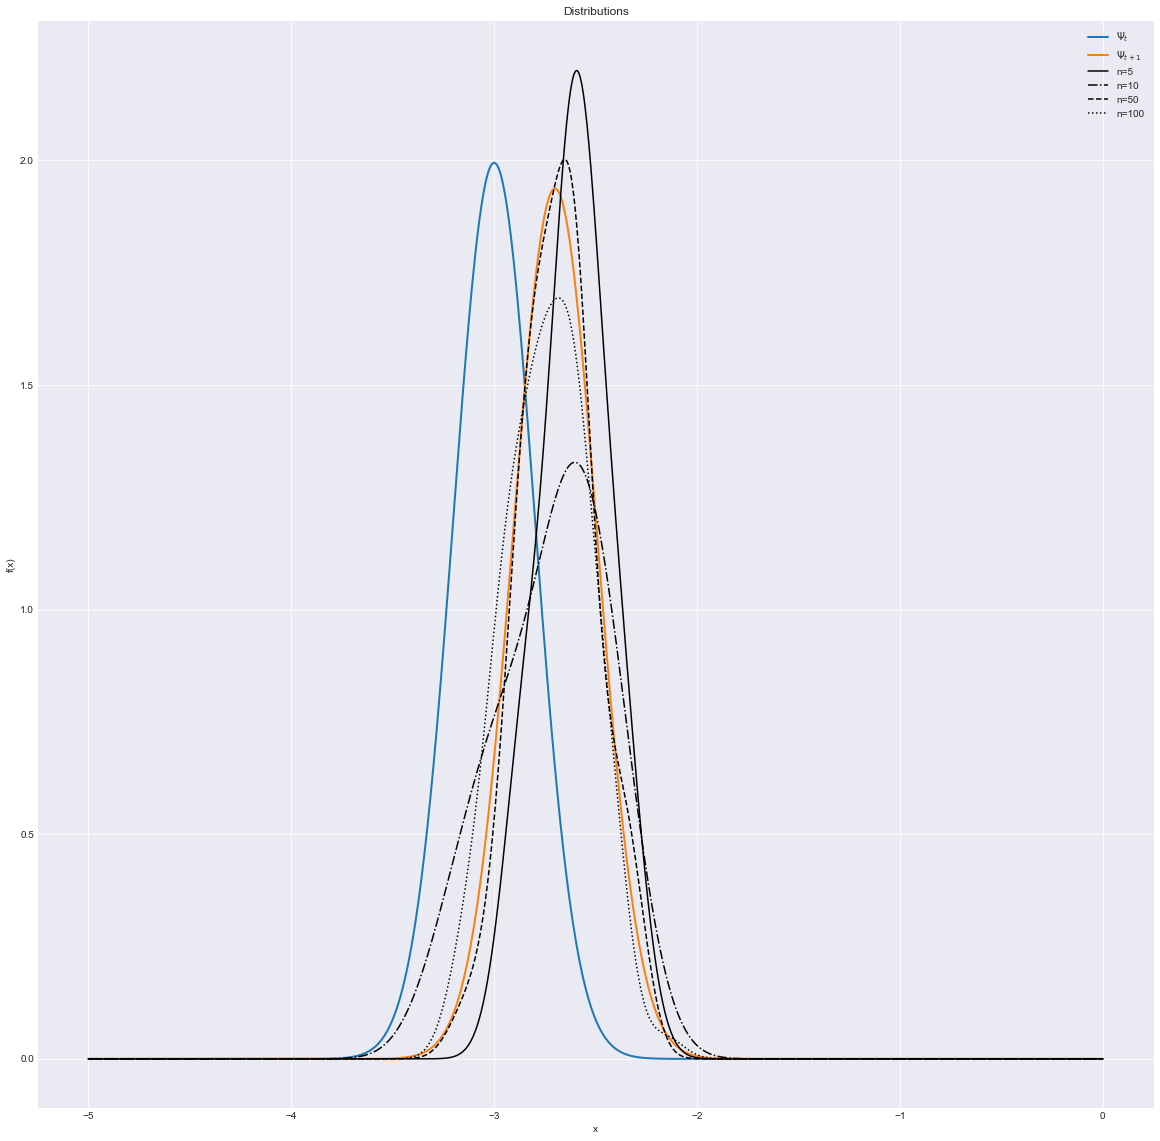

In [64]:
plt.figure(figsize=(20, 20))
# Plot the true distribution first
plt.plot(x, norm.pdf(x, mu, s), linewidth=2.0)
plt.plot(x, norm.pdf(x, rho*mu + b, ((rho**2)*(s**2) + sigma**2)**0.5), linewidth = 2.0)
# Plot the several simulation
plt.plot(x, simulation_1, 'k-', markersize = 1)
plt.plot(x, simulation_2, 'k-.', markersize = 1 )
plt.plot(x, simulation_3, 'k--', markersize = 1)
plt.plot(x, simulation_4, 'k:', markersize = 1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['$\Psi_{t}$', '$\Psi_{t+1}$', 'n=5', 'n=10', 'n=50', 'n=100'])
plt.title('Distributions')
plt.show()

From the graph shown above, we notice that when n increases, the simulation based estimate of $\psi_{t+1}$ does gradually converge to the theoretical distribution.

#### Exercise 3

** Proof:**

From the Gelfand's formula, we know that:

$||A^k||^{1/k} \to r(A)$.

By the continuous mapping theorem, we rearrange the above formula:
    
$||A^k|| \to r(A)^{k}$

Since from the settings, we have:

$ r(A) < 1 \implies lim_{k \to \infty} r(A)^k = 0 $

Therefore, we have $lim_{k \to \infty}||A^k|| = 0$

### Part 3

#### Exercise 1

In [65]:
# First still import the packaged and library used in this part
import quantecon as qe

In [69]:
# Define the Probability Transition Matrix
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

The stationary distribution is [[ 0.20254451  0.20379879  0.20742102  0.19505842  0.09287832  0.0503871
   0.03932382  0.00858802]]


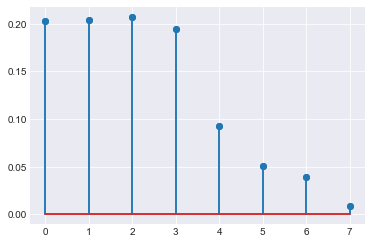

In [70]:
#Compute Stationary Distributions
P = qe.markov.core.MarkovChain(P)
print("The stationary distribution is", P.stationary_distributions)

# plot the stationary distribution 
plt.stem(P.stationary_distributions.flatten())
plt.show()

#### Exercise 2

The stationary distribution is [ 0.20258   0.20401   0.208235  0.19415   0.092505  0.05065   0.03931
  0.00856 ]


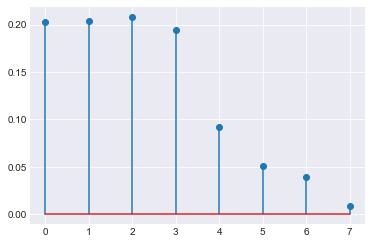

In [74]:
psi = P.simulate(200000)
distribution = np.zeros(8)
for i in range(8):
    distribution[i] = len(psi[psi == i])/len(psi)

print("The stationary distribution is", distribution)

# Plot the results of stationary distribution
plt.stem(distribution)
plt.show()

From the result and graph shown above, we can comfirm that it is similar to the stationary distribution we computed in exercise 1.

#### Exercise 3

[[7 2 3 ..., 4 5 5]
 [6 1 1 ..., 1 2 1]
 [5 1 0 ..., 1 2 2]
 ..., 
 [0 6 1 ..., 1 1 3]
 [0 0 2 ..., 0 0 1]
 [3 1 3 ..., 0 2 4]]


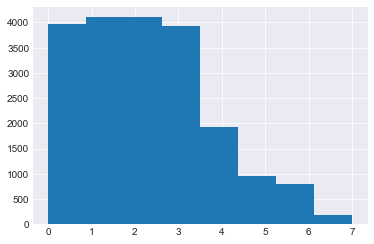

In [75]:
psi =P.simulate(ts_length=20000, num_reps = 20000).T

print(psi)

# Visualization
plt.hist(psi[-1, :], bins = 8)
plt.show()

From the histogram shown above, we can confirm that the empirical distribution is close to the stationary distribution ploted in the exercise 1.